In [159]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns


/Users/ellarajaonson/miniconda3/envs/mix/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DataFrame definition

In [27]:
cid_df = pd.read_csv("../dataset/raw/CID.csv")
cid_df.head()

,molecule,SMILES,is_solvent
0,-1,NaN,TRUE (Paraffin Oil)
1,-2,NaN,TRUE (Mineral Oil)
2,10313079,CN(C)C.Cl,FALSE
3,10400,C1CCCC(=O)CC1,FALSE
4,10430,CC(C)CC(=O)O,FALSE


In [28]:
task2_components = pd.read_csv("../dataset/raw/TASK2_Component_definition.csv")
task2_components.head()

,id,CID,dilution,solvent
0,1,-1,1.0,nt
1,2,-2,0.1,pg
2,3,-3,0.5,pg
3,4,-4,1.0,nt
4,5,-5,1.0,nt


In [29]:
task2_mix_mol_labels = pd.read_csv("../dataset/raw/TASK2_Train_mixture_Dataset.csv")
task2_mix_mol_labels.head()

,stimulus,Intensity,Pleasantness,Green,Cucumber,Herbal,Mint,Woody,Pine,Floral,...,Phenolic,Animal,Medicinal,Cooling,Sharp,Chlorine,Alcoholic,Plastic,Ozone,Metallic
0,AA007,3.888462,5.650000,0.653846,2.807692,0.076923,0.038462,0.000000,0.115385,0.461538,...,0.153846,0.192308,0.153846,0.269231,0.000000,0.346154,0.076923,0.269231,0.000000,0.000000
1,AA085,7.653846,4.765385,0.076923,0.000000,0.692308,0.730769,0.000000,0.000000,0.153846,...,0.153846,0.000000,2.346154,2.346154,0.923077,0.076923,0.692308,0.000000,0.115385,0.000000
2,AA088,6.111538,4.261538,0.884615,0.038462,0.692308,0.115385,0.153846,0.000000,0.192308,...,0.769231,0.000000,0.846154,0.038462,0.038462,0.653846,0.346154,0.192308,0.384615,0.192308
3,AA097,6.246154,6.411538,0.307692,2.538462,0.076923,0.192308,0.000000,0.000000,0.038462,...,0.000000,0.000000,0.000000,0.076923,0.000000,0.384615,0.000000,0.000000,0.000000,0.000000
4,AA142,6.430769,4.923077,0.076923,0.000000,0.038462,0.000000,0.230769,0.000000,0.807692,...,0.269231,0.000000,0.153846,0.000000,0.038462,0.038462,0.000000,0.115385,0.038462,0.000000


In [30]:
task1_stimulus = pd.read_csv("../dataset/raw/TASK1_Stimulus_definition.csv")
task1_stimulus.head()

,stimulus,molecule,dilution,solvent,Intensity_label
0,B253,177,0.001,PG,L
1,B003,177,0.100,PG,H
2,B670,240,0.400,PG,H
3,B668,240,0.001,PG,L
4,D014,263,0.200,PG,H


In [31]:
task1_mol_labels = pd.read_csv("../dataset/raw/TASK1_training.csv")
task1_mol_labels.head()

,stimulus,Intensity,Pleasantness,Green,Cucumber,Herbal,Mint,Woody,Pine,Floral,...,Phenolic,Animal,Medicinal,Cooling,Sharp,Chlorine,Alcoholic,Plastic,Ozone,Metallic
0,A095,7.579412,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235294,...,0.000000,0.352941,0.000000,0.029412,0.411765,0.176471,0.029412,0.088235,0.029412,0.000000
1,A240,5.976471,5.397059,1.088235,0.058824,1.264706,0.205882,0.735294,0.647059,0.117647,...,0.176471,0.000000,0.470588,0.411765,0.088235,0.147059,0.000000,0.235294,0.500000,0.058824
2,A315,5.761765,5.176471,0.411765,0.000000,0.382353,0.000000,0.058824,0.147059,0.000000,...,0.147059,0.029412,0.441176,0.235294,0.058824,0.176471,1.911765,0.000000,0.382353,0.088235
3,A355,5.947059,5.729412,0.235294,0.058824,0.058824,0.088235,0.058824,0.176471,0.088235,...,0.117647,0.000000,0.147059,0.147059,0.117647,0.000000,0.117647,0.352941,0.294118,0.029412
4,A430,4.888235,5.264706,0.176471,0.000000,0.029412,0.000000,0.000000,0.058824,0.235294,...,0.000000,0.000000,0.058824,0.000000,0.058824,0.058824,0.029412,0.000000,0.000000,0.000000


In [52]:
task2_single_mol_labels = pd.read_csv("../dataset/raw/Task2_single_RATA.csv")
task2_single_mol_labels = task2_single_mol_labels.drop(columns=["NoOdor"])
task2_single_mol_labels.head()

,stimulus,components,molecule,dilution,Intensity,Pleasantness,Green,Cucumber,Herbal,Mint,...,Phenolic,Animal,Medicinal,Cooling,Sharp,Chlorine,Alcoholic,Plastic,Ozone,Metallic
0,A014,NaN,5363388,0.0100,6.329412,6.500000,0.852941,0.323529,0.147059,0.088235,...,0.117647,0.0,0.205882,0.176471,0.029412,0.000000,0.205882,0.058824,0.088235,0.0
1,A192,NaN,32594,0.0001,3.882353,5.067647,0.500000,0.323529,0.176471,0.000000,...,0.029412,0.0,0.117647,0.176471,0.117647,0.000000,0.117647,0.000000,0.000000,0.0
2,A351,NaN,31265,0.0001,3.144118,5.391176,0.147059,0.117647,0.000000,0.088235,...,0.000000,0.0,0.058824,0.058824,0.000000,0.000000,0.176471,0.029412,0.000000,0.0
3,A557,NaN,3314,0.0050,5.064706,5.823529,0.117647,0.000000,0.588235,0.117647,...,0.000000,0.0,0.176471,0.000000,0.000000,0.000000,0.029412,0.000000,0.088235,0.0
4,A800,NaN,6561,0.0005,3.432353,5.017647,0.205882,0.000000,0.029412,0.000000,...,0.029412,0.0,0.029412,0.000000,0.058824,0.029412,0.058824,0.000000,0.000000,0.0


In [33]:
task2_stimulus = pd.read_csv("../dataset/raw/TASK2_Stimulus_definition.csv")
task2_stimulus.head()

,id,components
0,166,121
1,180,412
2,199,442
3,204,345
4,375,133


In [34]:
task2_stimulus

,id,components
0,166,121
1,180,412
2,199,442
3,204,345
4,375,133
...,...,...
1040,L218,76
1041,L411,476
1042,L788,110
1043,L824,306


# Linearity of olfactory mixtures

In [37]:
task2_stimulus["components"] = task2_stimulus["components"].apply(lambda x: [int(i) for i in x.split(";")])

In [38]:
task2_stimulus["num_components"] = task2_stimulus["components"].apply(lambda x: len(x))

In [39]:
task2_stimulus

,id,components,num_components
0,166,[121],1
1,180,[412],1
2,199,[442],1
3,204,[345],1
4,375,[133],1
...,...,...,...
1040,L218,[76],1
1041,L411,[476],1
1042,L788,[110],1
1043,L824,[306],1


In [78]:
#Downselect to get only training data
task2_stimulus = task2_stimulus[task2_stimulus["id"].isin(task2_mix_mol_labels["stimulus"]) | task2_stimulus["id"].isin(task2_single_mol_labels["stimulus"])]
task2_stimulus

,id,components,num_components
0,166,[121],1
2,199,[442],1
3,204,[345],1
7,423,[155],1
11,588,[527],1
...,...,...,...
1032,J622,[341],1
1033,J670,[130],1
1035,K853,[499],1
1040,L218,[76],1


In [84]:
task2_stimulus_1 = task2_stimulus[task2_stimulus["num_components"] == 1]
task2_stimulus_1_components = set(task2_stimulus_1["components"].explode())

In [85]:
len(task2_stimulus_1_components)

119

## A lot of mixtures have undefined single component odors

In [92]:
task2_stimulus_2 = task2_stimulus[task2_stimulus["num_components"] == 2]
print(task2_stimulus_2.shape)
task2_stimulus_2 =  task2_stimulus_2[task2_stimulus_2["components"].apply(lambda x: all(val in task2_stimulus_1_components for val in x))]
print(task2_stimulus_2.shape)


(174, 3)
(53, 3)


In [175]:
task2_stimulus_3 = task2_stimulus[task2_stimulus["num_components"] == 3]
print(task2_stimulus_3.shape)
task2_stimulus_3 =  task2_stimulus_3[task2_stimulus_3["components"].apply(lambda x: all(val in task2_stimulus_1_components for val in x))]
print(task2_stimulus_3.shape)


(22, 3)
(0, 3)


In [93]:
task2_stimulus_5 = task2_stimulus[task2_stimulus["num_components"] == 5]
print(task2_stimulus_5.shape)
task2_stimulus_5 =  task2_stimulus_5[task2_stimulus_5["components"].apply(lambda x: all(val in task2_stimulus_1_components for val in x))]
print(task2_stimulus_5.shape)

(117, 3)
(0, 3)


In [102]:
task2_stimulus_5 = task2_stimulus[task2_stimulus["num_components"] == 5]
print(task2_stimulus_5.shape)

invalid_rows = task2_stimulus_5[task2_stimulus_5['components'].apply(
    lambda x: any(val not in task2_stimulus_1_components for val in x))
]

invalid_components = invalid_rows['components'].apply(
    lambda x: [val for val in x if val not in task2_stimulus_1_components]
)

all_invalid_components = [comp for sublist in invalid_components for comp in sublist]

unique_invalid_components = set(all_invalid_components)

print("Mismatching components len: ", len(unique_invalid_components))
print("Mismatching components: ", unique_invalid_components)

(117, 3)
Mismatching components len:  139
Mismatching components:  {515, 521, 524, 13, 14, 15, 18, 19, 21, 22, 23, 28, 31, 34, 65, 78, 84, 88, 93, 100, 101, 110, 112, 113, 114, 115, 116, 118, 119, 123, 124, 125, 126, 127, 128, 142, 145, 146, 150, 151, 154, 161, 163, 166, 169, 171, 172, 175, 179, 184, 185, 186, 189, 193, 195, 196, 200, 204, 206, 207, 208, 209, 211, 213, 214, 215, 220, 226, 231, 232, 244, 249, 250, 252, 253, 254, 256, 263, 264, 265, 270, 274, 275, 279, 280, 282, 284, 285, 286, 293, 297, 303, 304, 310, 311, 312, 317, 319, 322, 324, 326, 332, 333, 334, 339, 353, 358, 371, 377, 382, 383, 384, 385, 387, 406, 409, 412, 413, 414, 420, 436, 451, 452, 453, 461, 464, 465, 468, 469, 472, 475, 477, 483, 485, 486, 491, 496, 497, 509}


In [96]:
task2_stimulus_10 = task2_stimulus[task2_stimulus["num_components"] == 10]
print(task2_stimulus_10.shape)
task2_stimulus_10 =  task2_stimulus_10[task2_stimulus_10["components"].apply(lambda x: all(val in task2_stimulus_1_components for val in x))]
print(task2_stimulus_10.shape)

(81, 3)
(0, 3)


In [103]:
task2_stimulus_10 = task2_stimulus[task2_stimulus["num_components"] == 10]
print(task2_stimulus_5.shape)

invalid_rows = task2_stimulus_10[task2_stimulus_10['components'].apply(
    lambda x: any(val not in task2_stimulus_1_components for val in x))
]

invalid_components = invalid_rows['components'].apply(
    lambda x: [val for val in x if val not in task2_stimulus_1_components]
)

all_invalid_components = [comp for sublist in invalid_components for comp in sublist]

unique_invalid_components = set(all_invalid_components)

print("Mismatching components len: ", len(unique_invalid_components))
print("Mismatching components: ", unique_invalid_components)

(117, 3)
Mismatching components len:  236
Mismatching components:  {513, 514, 515, 517, 518, 519, 521, 522, 523, 524, 525, 15, 16, 19, 22, 23, 29, 30, 31, 32, 33, 35, 36, 39, 41, 42, 43, 45, 46, 48, 49, 50, 55, 56, 58, 62, 63, 65, 66, 70, 71, 75, 77, 78, 80, 81, 82, 85, 86, 87, 88, 90, 91, 100, 102, 103, 106, 107, 109, 111, 114, 116, 126, 135, 136, 141, 148, 152, 158, 162, 163, 164, 165, 166, 167, 168, 173, 174, 175, 176, 177, 179, 182, 184, 185, 187, 188, 189, 190, 191, 194, 197, 198, 199, 200, 202, 203, 204, 211, 212, 213, 214, 216, 220, 223, 225, 226, 232, 233, 234, 235, 236, 238, 239, 242, 244, 246, 247, 248, 249, 251, 253, 255, 256, 264, 267, 279, 280, 282, 285, 290, 291, 292, 293, 294, 306, 323, 326, 327, 329, 330, 332, 333, 334, 336, 347, 348, 350, 351, 352, 353, 354, 355, 356, 358, 359, 360, 363, 364, 366, 368, 369, 370, 371, 373, 374, 375, 376, 377, 380, 382, 383, 385, 387, 390, 391, 393, 394, 395, 396, 397, 398, 400, 403, 404, 406, 407, 408, 411, 412, 418, 419, 420, 421, 422,

## For those for which it is possible

In [149]:
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr

In [134]:
task2_stimulus_2 = task2_stimulus[task2_stimulus["num_components"] == 2]
print(task2_stimulus_2.shape)
task2_stimulus_2 =  task2_stimulus_2[task2_stimulus_2["components"].apply(lambda x: all(val in task2_stimulus_1_components for val in x))]
print(task2_stimulus_2.shape)


true_label_list = []
avg_component_label_list = []
for i, row in task2_stimulus_2.iterrows():

    print(row["id"], row["components"])

    true_label = task2_mix_mol_labels[task2_mix_mol_labels["stimulus"] == row["id"]].copy().drop(columns=["stimulus"])

    print(true_label.shape)

    cmp_labels = []
    for cmp in row["components"]:

        stimulus_single = task2_stimulus[task2_stimulus["components"].apply(lambda x: x == [cmp])]
        if not stimulus_single.empty:

            stimulus_single_id_list = stimulus_single["id"].values

            if len(stimulus_single_id_list) != 1:
                print("found duplicated stimulus")

            avg_stimulus_label = []
            for stimulus_single_id in stimulus_single_id_list:
                avg_stimulus_label.append(
                    task2_single_mol_labels[
                        task2_single_mol_labels["stimulus"] == stimulus_single_id
                    ].copy().drop(columns=["stimulus", "components", "molecule", "dilution"])
                )

            cmp_labels.append(pd.DataFrame(pd.concat(avg_stimulus_label).mean().values.reshape(1, -1), columns=true_label.columns))

    avg_component_label = pd.DataFrame(pd.concat(cmp_labels).mean().values.reshape(1, -1), columns=true_label.columns)

    true_label_list.append(true_label)
    avg_component_label_list.append(avg_component_label)

true_label_df = pd.concat(true_label_list)
avg_component_label_df = pd.concat(avg_component_label_list)

(174, 3)
(53, 3)
AA142 [121, 527]
(1, 53)
AA368 [494, 527]
(1, 53)
AA725 [121, 96]
(1, 53)
AA886 [345, 442]
(1, 53)
found duplicated stimulus
AA893 [121, 61]
(1, 53)
AA944 [340, 96]
(1, 53)
AA962 [121, 527]
(1, 53)
AA978 [345, 155]
(1, 53)
AB222 [527, 96]
(1, 53)
AB223 [527, 321]
(1, 53)
AB226 [527, 61]
(1, 53)
AB399 [340, 442]
(1, 53)
found duplicated stimulus
AB486 [121, 442]
(1, 53)
found duplicated stimulus
AB988 [494, 121]
(1, 53)
AC214 [433, 281]
(1, 53)
found duplicated stimulus
AD427 [53, 345]
(1, 53)
AD862 [346, 121]
(1, 53)
AD919 [83, 345]
(1, 53)
found duplicated stimulus
AE042 [243, 361]
(1, 53)
found duplicated stimulus
AE043 [38, 159]
(1, 53)
found duplicated stimulus
AE061 [69, 361]
(1, 53)
AE067 [243, 60]
(1, 53)
found duplicated stimulus
AE099 [432, 528]
(1, 53)
found duplicated stimulus
AE140 [38, 361]
(1, 53)
found duplicated stimulus
AE142 [432, 365]
(1, 53)
AE148 [389, 531]
(1, 53)
found duplicated stimulus
found duplicated stimulus
AE153 [432, 531]
(1, 53)
found d

## Cosine distance between label avg of single components vs true label

In [143]:
# List to store the cosine distances for each row pair
cosine_distances = []

# Iterate over corresponding rows of df1 and df2
for i in range(true_label_df.shape[0]):
    row1 = true_label_df.iloc[i].values  # Extract the row as a numpy array
    row2 = avg_component_label_df.iloc[i].values  # Extract the corresponding row from df2
    
    # Calculate the cosine distance between the two rows
    cosine_dist = cosine(row1, row2)
    
    # Append the cosine distance to the list
    cosine_distances.append(cosine_dist)

# Convert the list of cosine distances into a pandas Series for easy viewing
cosine_dist_series = pd.Series(cosine_distances, name='cosine_distance')

In [138]:
cosine_dist_series.mean()

0.02256660833196041

In [154]:
# List to store the Pearson correlation coefficients for each row pair
pearson_correlations = []

# Iterate over corresponding rows of df1 and df2
for i in range(true_label_df.shape[0]):
    row1 = true_label_df.iloc[i].values  # Extract the row as a numpy array
    row2 = avg_component_label_df.iloc[i].values  # Extract the corresponding row from df2
    
    # Calculate the Pearson correlation coefficient between the two rows
    corr, _ = pearsonr(row1, row2)  # _ is the p-value, which we're not using here
    
    # Append the Pearson correlation coefficient to the list
    pearson_correlations.append(corr)

# Convert the list of Pearson correlations into a pandas Series for easy viewing
pearson_corr_series = pd.Series(pearson_correlations, name='pearson_correlation')

In [155]:
pearson_corr_series.mean()

0.9744554189918841

## Cosine distance between true labels of different 2 component mixtures

In [144]:
# List to store the average cosine distance for each row
avg_cosine_distances = []

# Iterate over each row in the DataFrame
for i in range(true_label_df.shape[0]):
    row1 = true_label_df.iloc[i].values  # Extract the current row as a numpy array
    
    # Calculate cosine distance between the current row and all other rows
    cosine_distances = []
    for j in range(true_label_df.shape[0]):
        if i != j:  # Skip the comparison with itself
            row2 = true_label_df.iloc[j].values  # Extract the other row as a numpy array
            cosine_dist = cosine(row1, row2)  # Calculate the cosine distance
            cosine_distances.append(cosine_dist)
    
    # Calculate the average cosine distance for the current row
    avg_cosine_dist = np.mean(cosine_distances)
    
    # Append the average cosine distance to the list
    avg_cosine_distances.append(avg_cosine_dist)

# Convert the list of average cosine distances into a pandas Series for easy viewing
avg_cosine_dist_series = pd.Series(avg_cosine_distances, name='avg_cosine_distance_true_label')

In [145]:
avg_cosine_dist_series.mean()

0.09507634595250514

In [152]:
# List to store the average Pearson correlation for each row
avg_pearson_correlations = []

# Iterate over each row in the DataFrame
for i in range(true_label_df.shape[0]):
    row1 = true_label_df.iloc[i].values  # Extract the current row as a numpy array
    
    # Calculate Pearson correlation between the current row and all other rows
    pearson_correlations = []
    for j in range(true_label_df.shape[0]):
        if i != j:  # Skip the comparison with itself
            row2 = true_label_df.iloc[j].values  # Extract the other row as a numpy array
            corr, _ = pearsonr(row1, row2)  # Calculate the Pearson correlation coefficient
            pearson_correlations.append(corr)
    
    # Calculate the average Pearson correlation for the current row
    avg_pearson_corr = np.mean(pearson_correlations)
    
    # Append the average Pearson correlation to the list
    avg_pearson_correlations.append(avg_pearson_corr)

# Convert the list of average Pearson correlations into a pandas Series for easy viewing
avg_pearson_corr_series = pd.Series(avg_pearson_correlations, name='avg_pearson_correlation_true_label')

In [153]:
avg_pearson_corr_series.mean()

0.891856117777107

# Projection of mixture labels based on num of components

In [157]:
task2_mix_mol_labels

,stimulus,Intensity,Pleasantness,Green,Cucumber,Herbal,Mint,Woody,Pine,Floral,...,Phenolic,Animal,Medicinal,Cooling,Sharp,Chlorine,Alcoholic,Plastic,Ozone,Metallic
0,AA007,3.888462,5.650000,0.653846,2.807692,0.076923,0.038462,0.000000,0.115385,0.461538,...,0.153846,0.192308,0.153846,0.269231,0.000000,0.346154,0.076923,0.269231,0.000000,0.000000
1,AA085,7.653846,4.765385,0.076923,0.000000,0.692308,0.730769,0.000000,0.000000,0.153846,...,0.153846,0.000000,2.346154,2.346154,0.923077,0.076923,0.692308,0.000000,0.115385,0.000000
2,AA088,6.111538,4.261538,0.884615,0.038462,0.692308,0.115385,0.153846,0.000000,0.192308,...,0.769231,0.000000,0.846154,0.038462,0.038462,0.653846,0.346154,0.192308,0.384615,0.192308
3,AA097,6.246154,6.411538,0.307692,2.538462,0.076923,0.192308,0.000000,0.000000,0.038462,...,0.000000,0.000000,0.000000,0.076923,0.000000,0.384615,0.000000,0.000000,0.000000,0.000000
4,AA142,6.430769,4.923077,0.076923,0.000000,0.038462,0.000000,0.230769,0.000000,0.807692,...,0.269231,0.000000,0.153846,0.000000,0.038462,0.038462,0.000000,0.115385,0.038462,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,AI453,5.707143,5.703571,0.000000,0.000000,0.392857,0.035714,0.035714,0.000000,0.607143,...,0.000000,0.178571,0.500000,0.035714,0.035714,0.000000,0.357143,0.035714,0.000000,0.071429
389,AI665,4.403571,5.289286,0.250000,0.035714,0.214286,0.071429,0.357143,0.000000,0.642857,...,0.000000,0.178571,0.178571,0.000000,0.000000,0.107143,0.107143,0.071429,0.000000,0.000000
390,AI681,5.525000,5.235714,0.000000,0.071429,0.107143,0.107143,0.142857,0.000000,0.500000,...,0.107143,0.214286,0.607143,0.000000,0.000000,0.000000,0.107143,0.000000,0.000000,0.000000
391,AI768,5.379310,5.241379,0.275862,0.034483,0.620690,0.206897,0.413793,0.000000,0.482759,...,0.103448,0.172414,0.448276,0.137931,0.000000,0.000000,0.379310,0.000000,0.068966,0.103448


In [158]:
task2_stimulus

,id,components,num_components
0,166,[121],1
2,199,[442],1
3,204,[345],1
7,423,[155],1
11,588,[527],1
...,...,...,...
1032,J622,[341],1
1033,J670,[130],1
1035,K853,[499],1
1040,L218,[76],1


/Users/ellarajaonson/miniconda3/envs/mix/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ellarajaonson/miniconda3/envs/mix/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


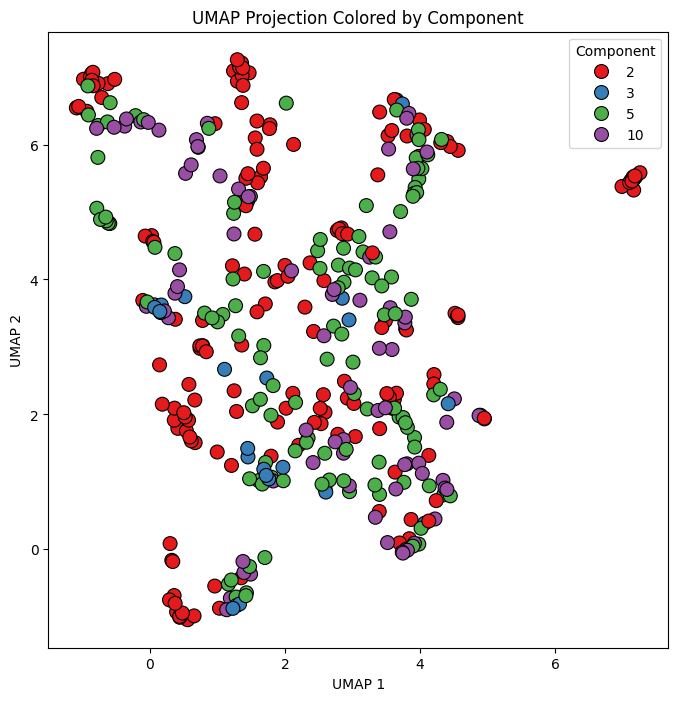

In [195]:
task2_data = task2_mix_mol_labels.iloc[:, 1:]

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
umap_projection = umap_model.fit_transform(task2_data)

merged_df = task2_mix_mol_labels.merge(task2_stimulus.rename(columns={"id": "stimulus"}), on='stimulus', how='left')

plt.figure(figsize=(8, 8))
sns.scatterplot(x=umap_projection[:, 0], y=umap_projection[:, 1], hue=merged_df['num_components'],
                palette='Set1', s=100, edgecolor='k', marker='o')

plt.title('UMAP Projection Colored by Component')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Component')
plt.show()

/Users/ellarajaonson/miniconda3/envs/mix/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ellarajaonson/miniconda3/envs/mix/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


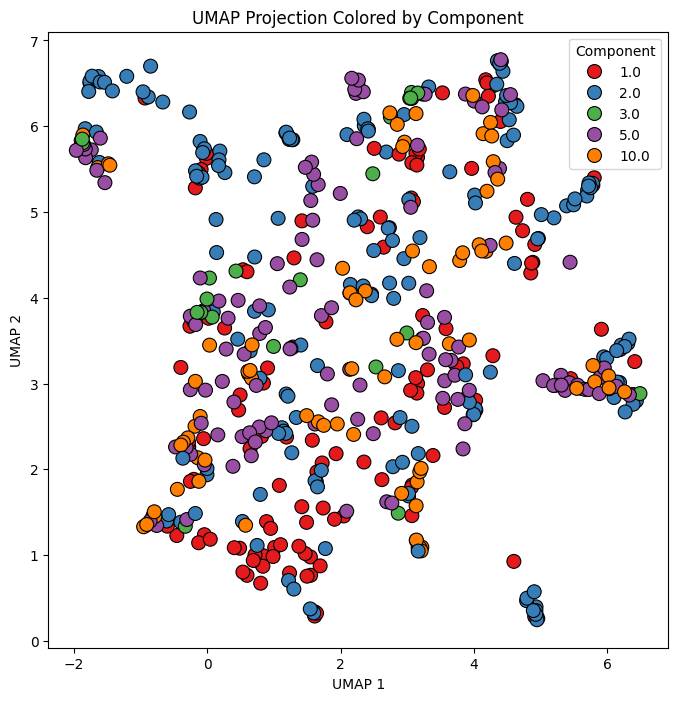

In [199]:
task2_data = pd.concat([task2_single_mol_labels.iloc[:, 4:], task2_mix_mol_labels.iloc[:, 1:]])
task2_labels = pd.concat([task2_single_mol_labels.drop(columns=["components", "molecule", "dilution"]), task2_mix_mol_labels])

umap_model = umap.UMAP(n_neighbors=20, min_dist=0.1, metric='cosine', random_state=42)
umap_projection = umap_model.fit_transform(task2_data)

merged_df = task2_labels.merge(task2_stimulus.rename(columns={"id": "stimulus"}), on='stimulus', how='left')

plt.figure(figsize=(8, 8))
sns.scatterplot(x=umap_projection[:, 0], y=umap_projection[:, 1], hue=merged_df['num_components'],
                palette='Set1', s=100, edgecolor='k', marker='o')

plt.title('UMAP Projection Colored by Component')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Component')
plt.show()